In [1]:
import pandas as pd
import numpy as np

from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [2]:
# Read dataset
d = pd.read_csv('churn_modeling.csv')

In [3]:
# Know your data
# Try to apply the techniques described in Session 4 and notebook KnowYourData
# that you think are useful to analyze this dataset
# head function displays the first five rows of the dataframe
d
d.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:>

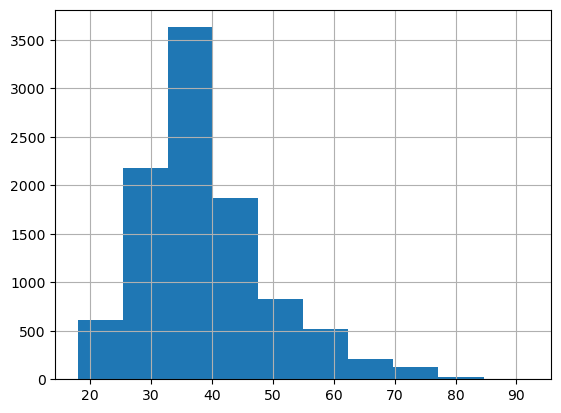

In [4]:
# Data distribution
# Histogram shows the age distribution in a clear way 
# most people are between 30-40 years old
# uneven
d['Age'].hist()

<AxesSubplot:>

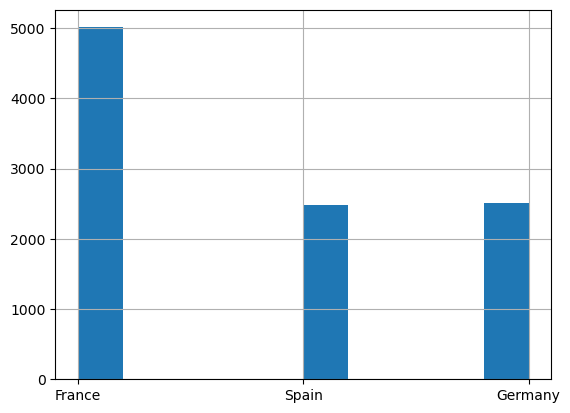

In [5]:
# Histogram shows the frequency of people from all three countries
# most people are from France
d['Geography'].hist()

<AxesSubplot:>

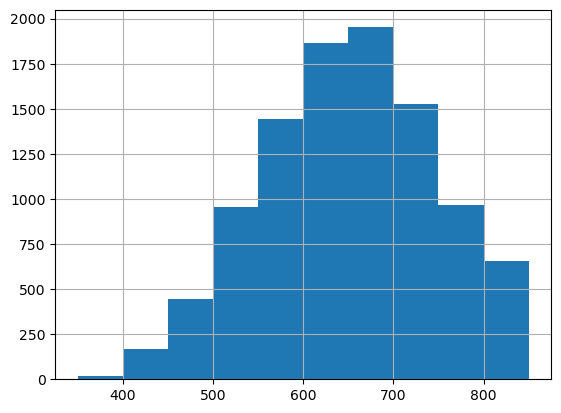

In [6]:
# average credit score between 600-700
# even distribution
d['CreditScore'].hist()

In [7]:
# Feature transformation: some suggested tasks
# - Detect and impute null values
d.isna().sum()
#   -- For null values imputation I suggest to use sklearn.impute.IterativeImputer
d.head()
d.info()

# - Drop the columns not used in the model
d = d.drop(columns=['CustomerId', 'Surname', 'RowNumber'])
d

# - Log transformations (if needed)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
# - Detect and encode categorical columns
# one-hot encoding Geography
encoded = pd.get_dummies(d, columns=['Geography'])
encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [9]:
# - Detect and encode categorical columns
# encoding Gender by assigning a 1 to male and a 0 to female in the same column
encoded['Gender'] = encoded.Gender.apply(lambda x: 1 if x=='Male' else 0)
encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [10]:
# Dataset balancing
# -----------------
# In the last notebook I included a small program to show how undersample/oversampling can be implemented
# You can use the same program chunk or try to use the resampling function provided by scikit-learn:
# https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html
# this function can be used both for undersample and onversampling

exited = d[d.Exited == 1]
not_exited = d[d.Exited == 0]

print(len(exited))
print(len(not_exited))

#in comparison to exercise 1, this example is not oversampled
#either way I will balance them in the cell below for my own learning

# If you are curious, there is a python package specialized in unbalanced datasets processing: 
# https://pypi.org/project/imbalanced-learn/, which includes several methods based in models

2037
7963


In [11]:
not_exited_indexes = not_exited.index

# get as many fraud indexes (randomly) as non fraud occurrences
np.random.seed(42)
random_non_exit_indexes = np.random.choice(not_exited_indexes, len(exited))

# Keep those entries in not fraud
not_exited = d.loc[random_non_exit_indexes]

# We will form the balanced dataset concatenating fraud and non_fraud
bln = exited.append(not_exited)

# Check the result
print(len(bln[bln.Exited == 1]))
print(len(bln[bln.Exited == 0]))

2037
2037


/var/folders/5j/hqscm36j00182v78hq0dsmz40000gn/T/ipykernel_13850/1716114607.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bln = exited.append(not_exited)


In [12]:
#Standardizing the model 
for column in ['CreditScore','Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']:
    encoded[column] = (encoded[column] - encoded[column].mean()) / encoded[column].std()
#When I commented the standardization, this decreased my training scores significantly
#So I kept the standardization

In [13]:
y = encoded['Exited']
X = encoded.drop('Exited', axis=1)
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.326205,0,42,-1.041708,-1.225786,-0.911538,1,1,0.021885,1,0,0
1,-0.440014,0,41,-1.387468,0.117344,-0.911538,0,1,0.216523,0,0,1
2,-1.536717,0,42,1.032856,1.332987,2.526930,1,0,0.240675,1,0,0
3,0.501496,0,39,-1.387468,-1.225786,0.807696,0,0,-0.108912,1,0,0
4,2.063781,0,43,-1.041708,0.785689,-0.911538,1,1,-0.365258,0,0,1


In [14]:
# At this point you must include the code to train the models, tune their metaparameters and crossvalidate the results
# An example of use of GridSearchCV with the roc_auc score:
#   # define the parameters grid  
#   params = [{'C': [1, 2], 'kernel': ['poly'], 'degree': [1, 2]}]
#   # get the models calling GridSearchCV
#   models = GridSearchCV(SVC(), params, scoring='roc_auc')
#   # fit the models
#   models.fit(X, y)
#   # At this point you have available in models all the attributes described for GridSearchCV

LogisticRegression: this model is quite simple and has not meta-parameters to fine tune. In this case you will use the function cross_val_score to measure the performance. Use the parameterscoring = ‘roc_auc’. The function cross_val_score will return a vector with the score for every partition in the cross validation. What value would you choose to show the performance of this model?

In [15]:
# checking the AUC score with cross validation using a Logistic Regression

lrg = LogisticRegression()
accuracy = cross_val_score(lrg, X, y, cv=7, scoring='roc_auc')
scores = pd.Series(accuracy)

name = 'Logistic Regression'

print(name)
scores.min(), scores.mean(), scores.max()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.7400828731786488, 0.7656475044189645, 0.7821855428526565)

SVM (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC): use the function GridSearchCV (grid search cross validation) to fine tune the metaparameters. In the code you will find an example of how to use the function

In [16]:
# An example of use of GridSearchCV with the roc_auc score:
#   # define the parameters grid  
#   params = [{'C': [1, 2], 'kernel': ['poly'], 'degree': [1, 2]}]
#   # get the models calling GridSearchCV
#   models = GridSearchCV(SVC(), params, scoring='roc_auc')
#   # fit the models
#   models.fit(X, y)
#   # At this point you have available in models all the attributes described for GridSearchCV
params = [{'C': [1, 2], 'kernel': ['poly'], 'degree': [1, 2]}]
models = GridSearchCV(SVC(probability=True), params, scoring='roc_auc', cv = 3)
models.fit(X, y)

GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid=[{'C': [1, 2], 'degree': [1, 2], 'kernel': ['poly']}],
             scoring='roc_auc')

In [17]:
print(models.best_score_)

0.8241891261239545


GradientBoostingClassifier(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html): gradient boosting is an ensemble method (a combitation of learners) which takes several ‘weak’ learners to obtain a strong learner. This method uses the gradients in the loss function to weight the points that are difficult to predict. Ensemble methods are very powerful and usually get very good results. Use GridSearchCV to tune the parameters ‘learning_rate’, ‘n_estimators’ and ‘criterion’

In [18]:
# GradientBoostingClassifier

from sklearn.model_selection import train_test_split

cbg = GradientBoostingClassifier()
params1 = {
    "n_estimators":[150],
    "learning_rate":[1.0],
    "max_depth":[3],
    "random_state":[50]
}
cv = GridSearchCV(cbg,params1,scoring='roc_auc',cv=7)
cv.fit(X, y)

GridSearchCV(cv=7, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [1.0], 'max_depth': [3],
                         'n_estimators': [150], 'random_state': [50]},
             scoring='roc_auc')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
roc_auc_score(y_test, cv.predict_proba(X_test)[:, 1])

0.9226847614244174